# Project Overview

This project analyzes customer distribution by contract type and related patterns to uncover actionable insights for retention and growth. By examining customer preferences across Month-to-Month, One-Year, and Two-Year contracts, the analysis highlights key drivers of customer behavior and business performance.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [4]:
df = pd.read_csv(r"C:\Users\Mansi\Downloads\Customer Churn.csv")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **1. Data Cleaning & Preparation**

### **Missing Values**
- Blank values in **`TotalCharges`** were replaced with **0** and converted to numeric.  
- This ensures that calculations and visualizations work correctly without errors.

### **Data Quality**
- No duplicate **`customerID`** values were found.  
- This confirms the dataset is **clean and unique per customer**.

### **Feature Transformation**
- Converted **`SeniorCitizen`** from **0/1** to **Yes/No**.  
- This makes plots and summaries **more readable and meaningful**.


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
print(df["TotalCharges"].dtype)
print(df["TotalCharges"].describe())

float64
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['customerID'].duplicated().sum()

np.int64(0)

### Converted SeniorCitizen from 0/1 to Yes/No.

In [26]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
        
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [24]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


# 1. Overall Churn Overview
## Purpose: Show how many customers churned vs stayed.

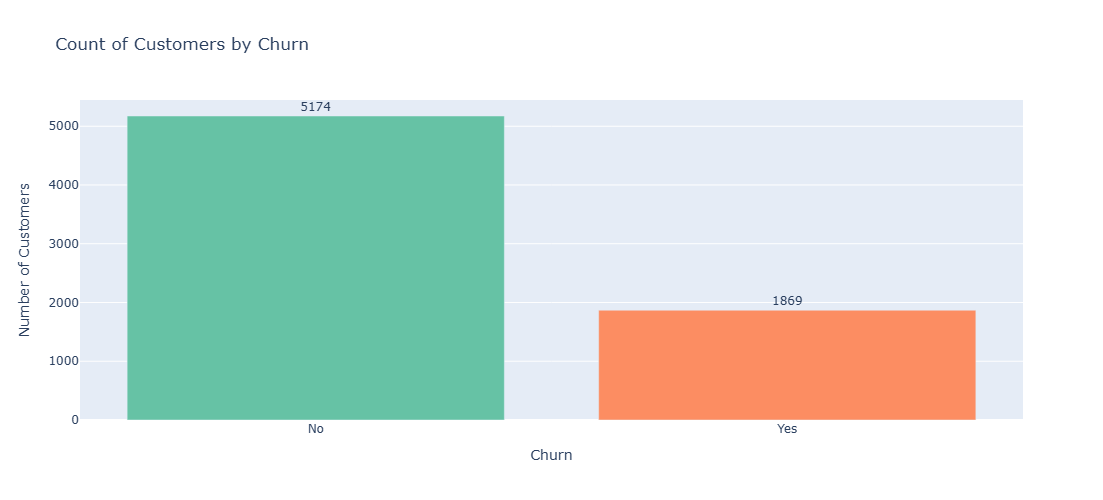

In [21]:
import plotly.express as px
# Count churn values
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Create Plotly bar chart
fig = px.bar(
    churn_counts,
    x='Churn',
    y='Count',
    color='Churn',
    color_discrete_sequence=px.colors.qualitative.Set2[:2],  # similar to your colors_clean
    text='Count',
    title='Count of Customers by Churn'
)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Churn',
    yaxis_title='Number of Customers',
    showlegend=False,
    height=500,
    width=500
)

fig.show()


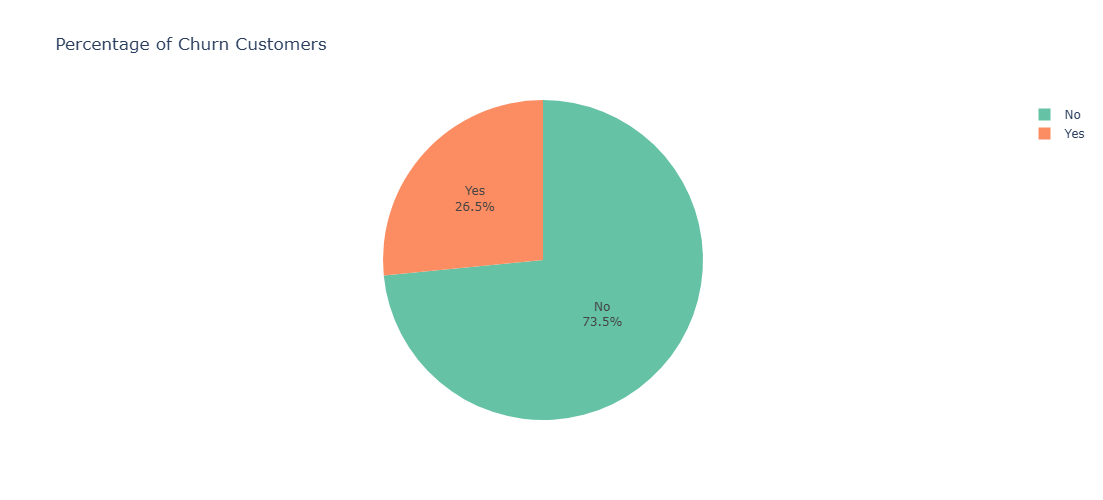

In [53]:
import plotly.express as px

# Prepare data
gb = df.groupby('Churn').agg({'Churn': 'count'}).rename(columns={'Churn': 'Count'}).reset_index()

# Create pie chart
fig = px.pie(
    gb,
    names='Churn',
    values='Count',
    color='Churn',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Percentage of Churn Customers',
    hole=0  # full pie (set to >0 for donut)
)

# Show percentage and labels
fig.update_traces(textinfo='percent+label')

# Set figure size
fig.update_layout(height=500, width=500)

fig.show()



## **2. Churn Overview**

- **Churn Count:** Out of the total customer base, **1,869 customers have churned**, while **5,174 customers have remained loyal** to the company.  

### **Percentage-wise Breakdown**
- **Churn Rate:** Approximately **26–27%** of customers have churned.  
- **Retention Rate:** Around **73%** of customers have stayed with the company.  

This analysis highlights that while the majority of customers are being retained, the **churn rate is still considerable**. Such a level of churn can **negatively impact recurring revenue, customer lifetime value, and overall business growth** if not addressed. It indicates an opportunity for the company to **focus on targeted retention strategies**, such as improving customer support, offering loyalty programs, or revisiting pricing and contract models.



# 2. Distribution by Charges


## Purpose: Show relation between costs and churn.

In [28]:
df[['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


## Discriptive statistics
### **1. Monthly Charges**
- **Range:** Monthly charges vary from **$18.25** to **$118.75**.  
- **Average (Mean):** Customers are billed **around $64.76 per month on average**.  
- **Typical Range (IQR):**
  - 25% of customers pay **below $35.50**  
  - 50% (median) pay **around $70.35**  
  - 75% pay **below $89.85**  
- **Insight:** The majority of customers fall within the **$35–$90 range**, indicating that the company has a strong **mid-tier pricing structure** that serves most of its customer base.

---

### **2. Total Charges**
- **Range:** Total charges range from **$0** to **$8,684.80**.  
- **Average (Mean):** Customers have generated **around $2,279 in total revenue** each.  
- **Distribution Insights:**
  - A significant number of customers have **very low total charges (close to $0)**, indicating **new customers or those who churned early**.  
  - Customers with **total charges above $3,000** represent **long-term loyal customers**, contributing a major share of revenue.  
  - The distribution is **right-skewed**, meaning **a smaller group of customers generates a larger portion of overall revenue**.


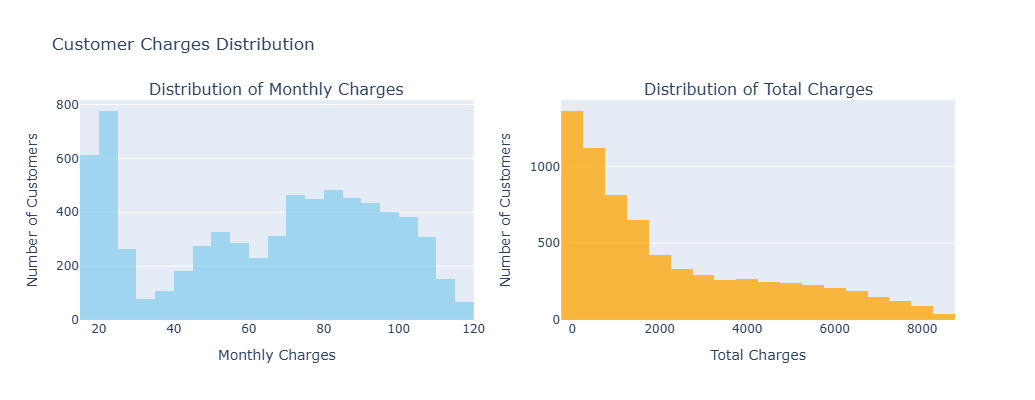

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution of Monthly Charges", "Distribution of Total Charges"))

# MonthlyCharges histogram
fig.add_trace(
    go.Histogram(
        x=df['MonthlyCharges'],
        nbinsx=30,
        marker_color='skyblue',
        name='MonthlyCharges',
        opacity=0.75
    ),
    row=1, col=1
)

# TotalCharges histogram
fig.add_trace(
    go.Histogram(
        x=df['TotalCharges'],
        nbinsx=30,
        marker_color='orange',
        name='TotalCharges',
        opacity=0.75
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Customer Charges Distribution",
    height=400,
    width=1000,
    showlegend=False
)

# Update axes labels
fig.update_xaxes(title_text="Monthly Charges", row=1, col=1)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)
fig.update_xaxes(title_text="Total Charges", row=1, col=2)
fig.update_yaxes(title_text="Number of Customers", row=1, col=2)

fig.show()



## **3. Charges Distribution Analysis**

### **Executive Summary**
The distribution of **Monthly Charges** and **Total Charges** reveals key insights about customer billing patterns and tenure.

---

### **Insights**

#### **1. Monthly Charges**
- Most customers are concentrated in the **$20–$90** range.  
- A significant spike near **$20** suggests a large portion of customers are subscribed to the **lowest-priced plans**.  
- Customers with **higher monthly charges (> $80)** might be using premium services or multiple add-ons.

**Implication:**  
Customers on higher-priced plans might need **better retention strategies** to reduce churn risk due to price sensitivity.

---

#### **2. Total Charges**
- A significant number of customers show **very low total charges (close to $0)**, suggesting they are **new sign-ups or early churners**.  
- Customers with **total charges exceeding $3,000** are **long-term loyal customers** who contribute substantially to overall revenue.  
- The distribution is **right-skewed**, indicating that a **smaller group of high-value customers generates a large share of revenue**.


**Implication:**  
Efforts should be made to **reduce early churn** and **retain high-value customers** by improving engagement and providing loyalty benefits.

---

### **Business Takeaways**
- Focus retention strategies on **high-value customers** to maximize revenue impact.  
- Investigate the reasons for **early churn** among customers with low total charges.  
- Explore **tiered loyalty programs or discounts** for customers on premium monthly plans.


# 3. Customer Demographics
## Purpose: See churn behavior by gender and senior status.

## Gender-Based Churn Signals Missed Opportunities

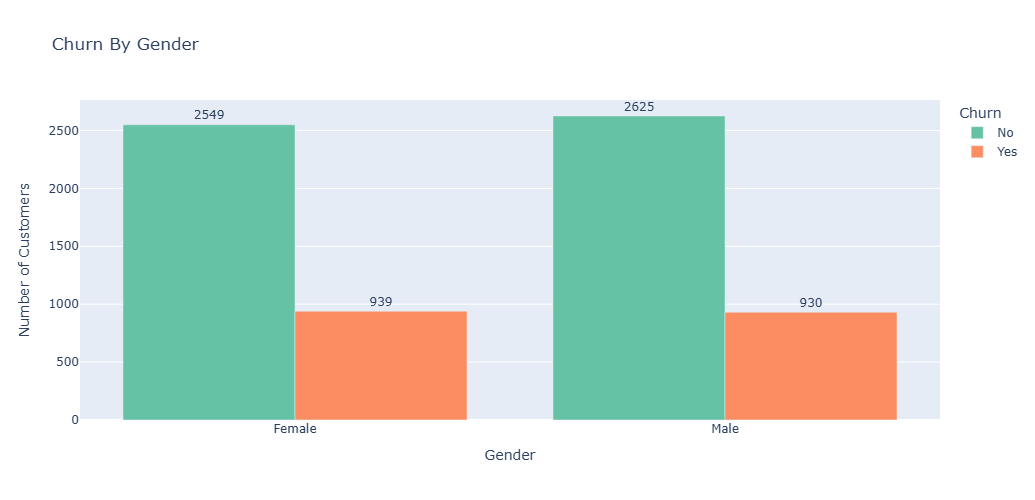

In [36]:
import plotly.express as px

# Count of churn by gender
gender_churn = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')

# Create bar chart
fig = px.bar(
    gender_churn,
    x='gender',
    y='Count',
    color='Churn',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='Count',
    title='Churn By Gender'
)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Customers',
    height=500,
    width=500
)

fig.show()


## Senior Citizens Are Slipping Through the Cracks

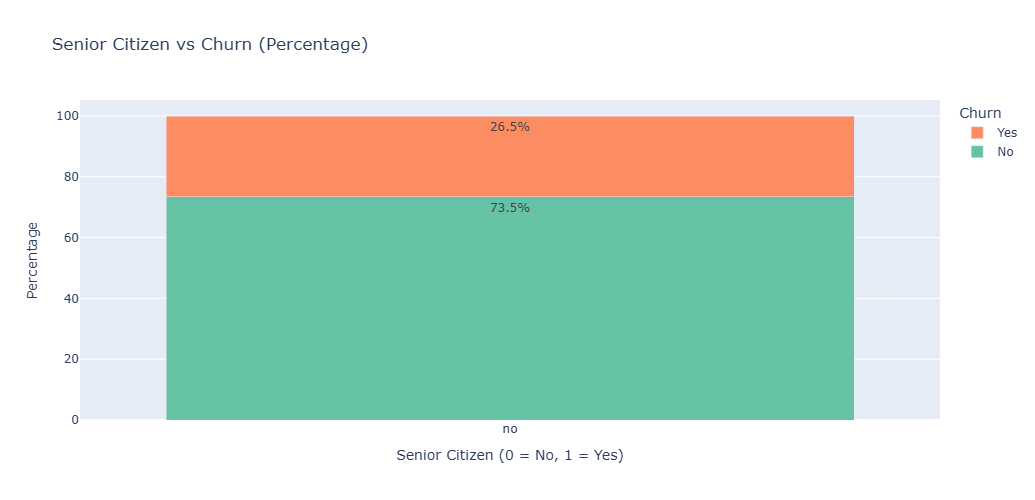

In [38]:
import plotly.graph_objects as go

# Prepare percentage data
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])
percentages = ct.div(ct.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig = go.Figure()

for churn_status in percentages.columns:
    fig.add_trace(go.Bar(
        x=percentages.index,
        y=percentages[churn_status],
        name=churn_status,
        text=[f'{val:.1f}%' for val in percentages[churn_status]],
        textposition='inside',
        marker_color=px.colors.qualitative.Set2[0] if churn_status == 'No' else px.colors.qualitative.Set2[1]
    ))

# Customize layout
fig.update_layout(
    barmode='stack',
    title='Senior Citizen vs Churn (Percentage)',
    xaxis_title='Senior Citizen (0 = No, 1 = Yes)',
    yaxis_title='Percentage',
    height=500,
    width=500,
    legend_title='Churn'
)

fig.show()


## Customer Demograpics Analysis
### **Churn by Gender**

- **Female Customers:**  
  - **Stayed:** 2,549  
  - **Churned:** 939  

- **Male Customers:**  
  - **Stayed:** 2,625  
  - **Churned:** 930  

#### **Key Insights**
- The churn rate is **almost identical for both genders**, indicating that **gender is not a significant factor** in customer churn.
- Retention strategies should focus on **service quality, pricing, or other behavioral factors**, rather than targeting by gender.

#### **Senior Citizen vs Churn (Percentage)**
- **Senior Citizens have a much higher churn rate (41.7%)** compared to non-senior customers (23.6%).  
- This indicates that **older customers are more likely to discontinue services**, possibly due to cost sensitivity, lack of digital adaptability, or unmet service needs.  
- **Business Insight:** Focused retention strategies, such as personalized support, senior-friendly plans, or loyalty rewards, could help reduce churn in this segment.



# 4. Tenure Analysis
## Purpose: Show churn pattern across tenure.

In [39]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

### **Tenure Summary**  
- **Total Customers Analyzed:** 7,043  
- **Average Tenure:** ~32 months, indicating that most customers stay for almost **2.5 years**.  
- **Standard Deviation:** ~24.6 months, showing a **wide variation** in customer retention durations.  
- **Minimum Tenure:** 0 months, representing **new customers or those who churned immediately**.  
- **25th Percentile (Q1):** 9 months — **25% of customers leave within the first year**.  
- **Median (Q2):** 29 months — **50% of customers stay for at least 2+ years**.  
- **75th Percentile (Q3):** 55 months — **top 25% customers remain loyal for over 4.5 years**.  
- **Maximum Tenure:** 72 months, indicating **customers staying for the full 6 years**.  


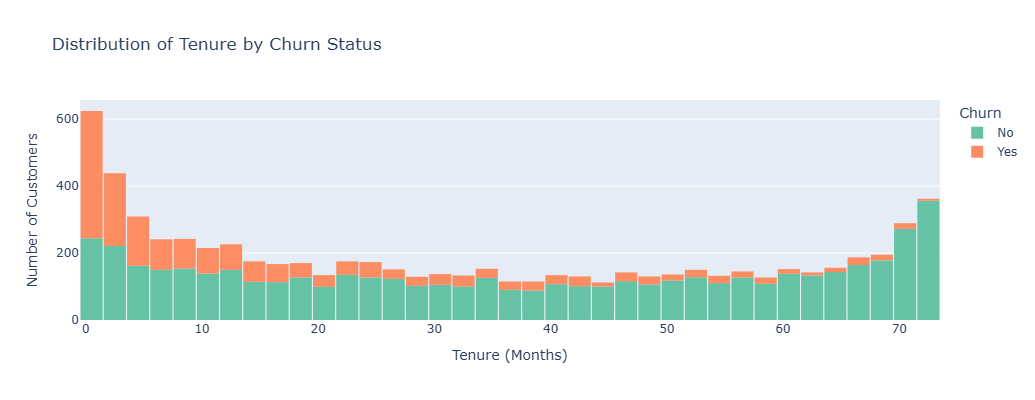

In [41]:
import plotly.express as px

fig = px.histogram(
    df,
    x='tenure',
    color='Churn',
    nbins=72,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Distribution of Tenure by Churn Status'
)

# Customize layout
fig.update_layout(
    xaxis_title='Tenure (Months)',
    yaxis_title='Number of Customers',
    bargap=0.05,
    height=400,
    width=900
)

fig.show()


### **Tenure vs Churn Analysis**
- **High churn among new customers:** A significant portion of customers churn within the **first few months** (tenure near 0).  
- **Steady retention mid-term:** Customers with tenure between **12 to 48 months** show **moderate churn rates**.  
- **Strong loyalty long-term:** Customers with **60+ months of tenure** show **very low churn**, indicating **high satisfaction and loyalty**.  
- **Key Insight:** Retention efforts should be focused on **new customers (0–12 months)** to reduce early churn and improve overall retention.  



# 5. Contract Type
## Purpose: Understand if contract type affects churn.

## Which contract type attracts the most customers

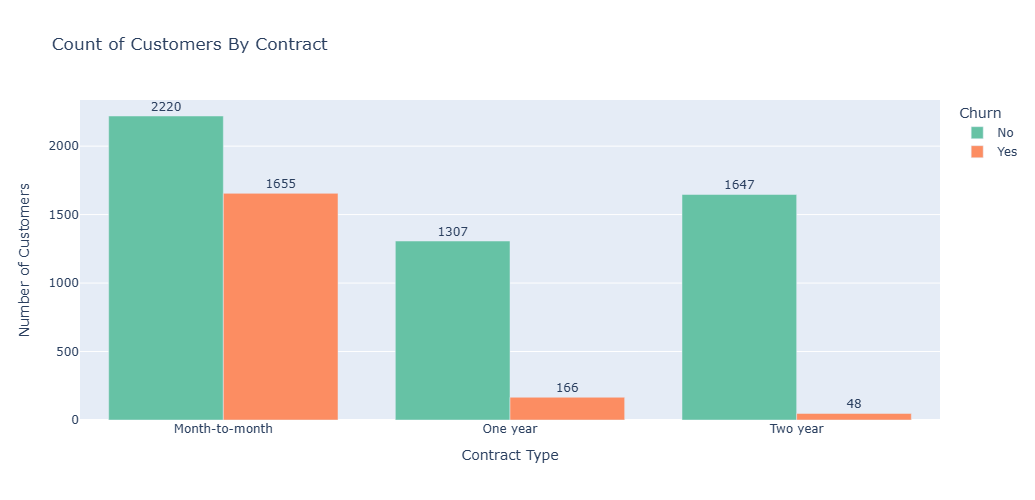

In [44]:
import plotly.express as px

# Prepare data
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')

# Create grouped bar chart
fig = px.bar(
    contract_churn,
    x='Contract',
    y='Count',
    color='Churn',
    barmode='group',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Count of Customers By Contract'
)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Contract Type',
    yaxis_title='Number of Customers',
    height=500,
    width=500,
    legend_title='Churn'
)

fig.show()


### **Count of Customers by Contract – Analysis**
- **Month-to-Month Contracts:**  
  - Highest churn rate with **1,655 customers** leaving.  
  - Indicates **low commitment and high flexibility**, making it easier for customers to switch.  

- **One-Year Contracts:**  
  - Churn drops significantly to **166 customers**.  
  - Suggests that **medium-term contracts improve retention**.  

- **Two-Year Contracts:**  
  - Very low churn of just **48 customers**.  
  - Indicates **long-term contracts build stronger loyalty** and reduce churn risk.  

- **Key Insight:**  
  Encouraging customers to switch from **month-to-month to longer-term contracts** can **significantly reduce churn** and improve customer lifetime value.  


# 6. Service Usage Distribution
## Purpose: See how optional services relate to churn.

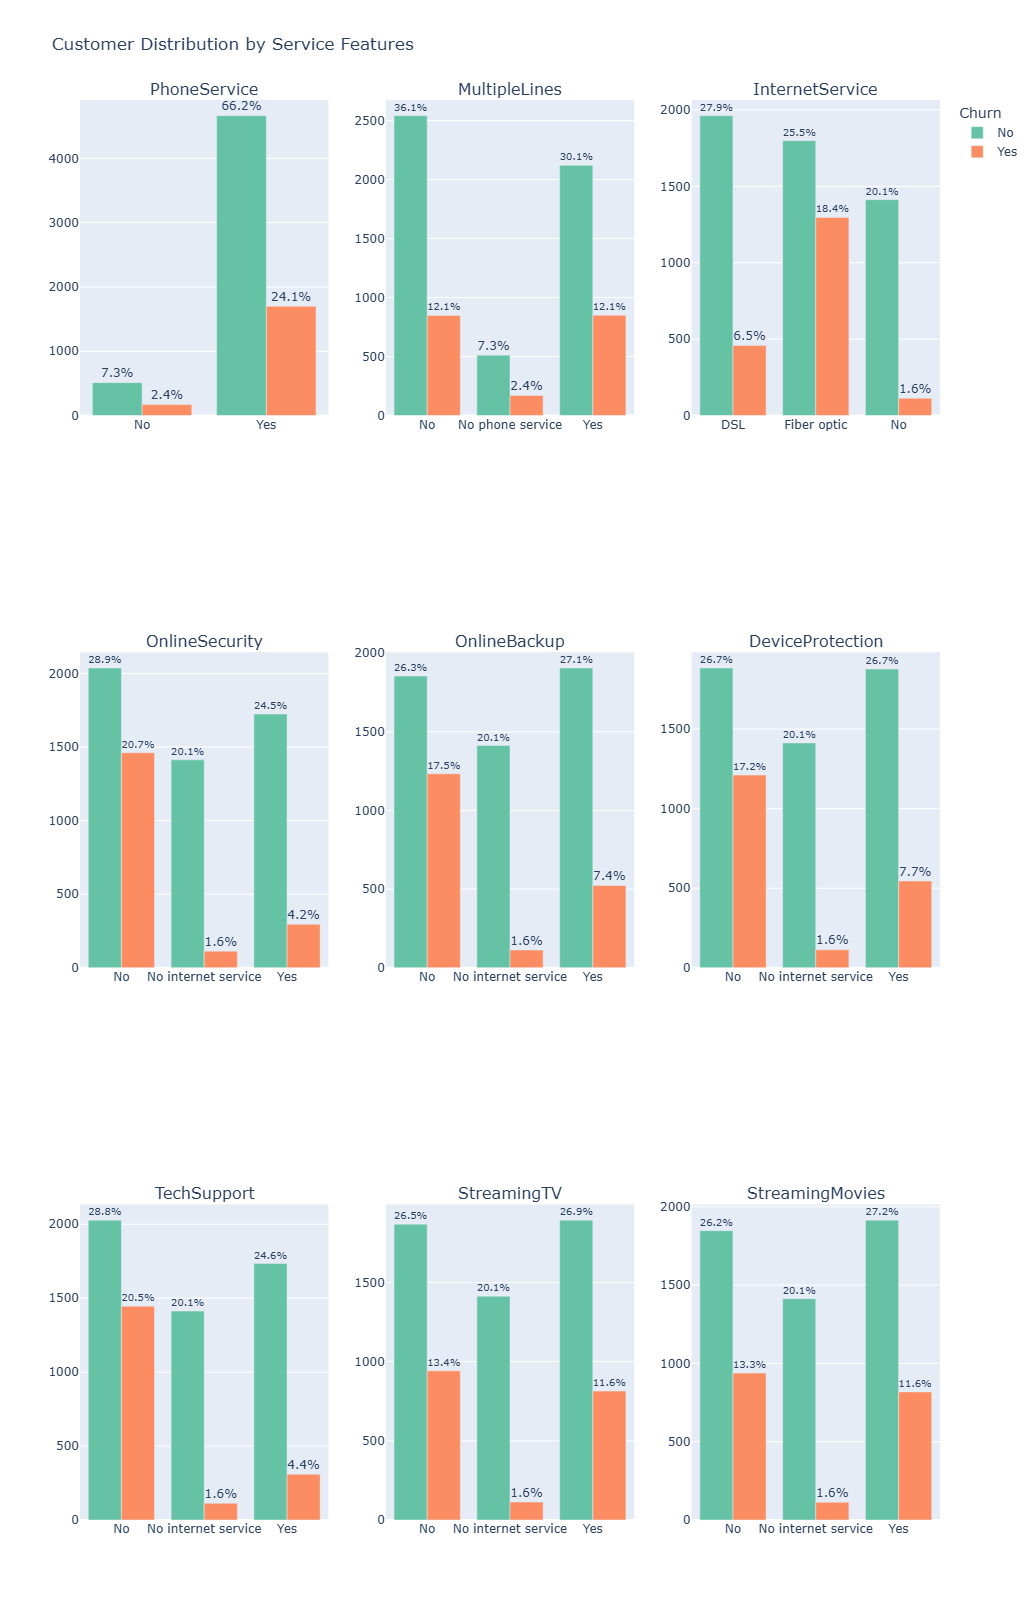

In [47]:

# Columns to plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create 3x3 subplot grid
fig = make_subplots(rows=3, cols=3, subplot_titles=[f'{col}' for col in cols])

total_rows = len(df)

for i, col in enumerate(cols):
    row = i // 3 + 1
    col_pos = i % 3 + 1

    # Prepare data
    temp = df.groupby([col, 'Churn']).size().reset_index(name='Count')
    for churn_status in temp['Churn'].unique():
        subset = temp[temp['Churn'] == churn_status]
        percentages = (subset['Count'] / total_rows) * 100

        fig.add_trace(
            go.Bar(
                x=subset[col],
                y=subset['Count'],
                name=churn_status,
                text=[f'{p:.1f}%' for p in percentages],
                textposition='outside',
                marker_color=px.colors.qualitative.Set2[0] if churn_status == 'No' else px.colors.qualitative.Set2[1],
                showlegend=(i == 0)  # Show legend only once
            ),
            row=row, col=col_pos
        )

# Layout tweaks
fig.update_layout(
    height=1600,
    width=1600,
    title_text='Customer Distribution by Service Features',
    barmode='group',
    legend_title='Churn'
)

fig.show()


### **Customer Distribution & Churn Anlysis**

#### **1. Phone Service**
- Majority have phone service (**66.2% no churn**, **24.1% churn**).
- Customers without phone service show very low churn.

#### **2. Multiple Lines**
- Single line customers (**36.7% no churn**) show slightly better retention.
- Multiple line customers show **higher churn (~12.1%)**.

#### **3. Internet Service**
- **Fiber optic** customers show **higher churn (~18.4%)**.
- **DSL** customers churn less (~6.5%).
- No internet service → minimal churn.

#### **4. Online Security**
- Customers **without online security** churn the most (**20.7%**).
- Customers with online security have **significantly lower churn (4.2%)**.

#### **5. Online Backup**
- Customers without backup services show **higher churn (~17.5%)**.
- Those with backup have relatively lower churn (~7.4%).

#### **6. Device Protection**
- Lack of device protection correlates with **higher churn (~17.2%)**.
- Customers with device protection churn less (~7.7%).

#### **7. Tech Support**
- Customers without tech support churn heavily (**20.5%**).
- Tech support presence reduces churn to **4.4%**.

#### **8. Streaming TV**
- Having streaming TV doesn’t significantly affect churn.
- **Churn ~13.4% without streaming TV**, ~11.6% with it.

#### **9. Streaming Movies**
- Streaming movies has **no significant impact on churn**.
- Churn rates similar (~13% without, ~11% with).

---

### **Key Insights**
- **Value-added services** (online security, backup, tech support) significantly **reduce churn**.  
- **Fiber optic customers** show higher churn and may require retention strategies.  
- Streaming services **don’t have a major impact** on churn behavior.


# 7. Payment Method
## Purpose: Analyze churn distribution by payment method.

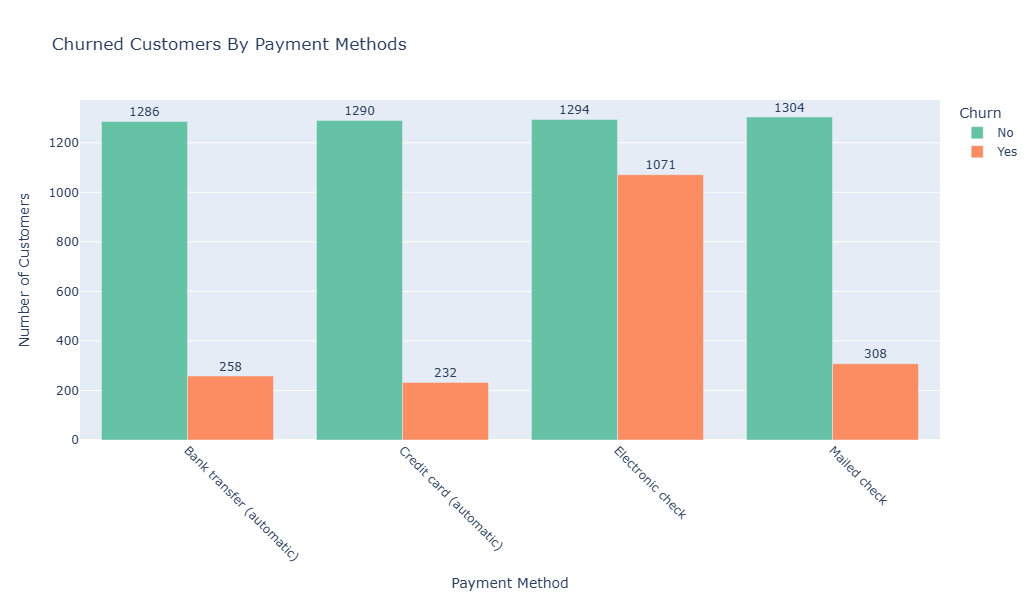

In [52]:
import plotly.express as px

# Prepare data
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Create grouped bar chart
fig = px.bar(
    payment_churn,
    x='PaymentMethod',
    y='Count',
    color='Churn',
    barmode='group',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Churned Customers By Payment Methods'
)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Payment Method',
    yaxis_title='Number of Customers',
    xaxis_tickangle=45,
    height=600,
    width=500,
    legend_title='Churn'
)

fig.show()


### Churn Analysis by Payment Method

**Electronic Check**  
- Highest churn: around 1071 customers churned  
- Indicates potential dissatisfaction or less loyalty among these users  

**Mailed Check**  
- Moderate churn: around 308 customers  
- Better retention compared to electronic check users  

**Bank Transfer (Automatic)**  
- Low churn: around 258 customers  
- Automatic payment seems to support retention  

**Credit Card (Automatic)**  
- Lowest churn: around 232 customers  
- Strongest retention among all payment methods  

### Key Insight
- Customers using automatic payment methods (bank transfer or credit card) have significantly lower churn  
- Electronic check users are most at risk and may need targeted retention strategies


# Final Key Insights

## Contract Distribution & Customer Behavior

- Majority of customers are on Month-to-Month contracts, showing a preference for flexibility but also creating high churn exposure.
Customers with One-Year and Two-Year contracts form a smaller but more loyal and stable segment, providing predictable revenue.+
Retention & Risk

- The dominance of short-term contracts means the business is more vulnerable to customer turnover. Even small fluctuations in Month-to-Month users can significantly affect revenue.

- Long-term contracts reduce churn risk, but their adoption rate remains relatively low.

## Opportunities for Growth

- There is a clear opportunity to convert flexible customers into long-term contracts using targeted incentives, loyalty programs, and bundled offers.

- Insights suggest that tailored engagement strategies by contract type can maximize both flexibility and stability.

## Customer Engagement Trends

- Usage patterns indicate variation in workout activity, subscription preferences, and demographics, which can be leveraged for personalized marketing and retention campaigns.

- Certain customer segments show higher activity and engagement, which can be nurtured into premium or long-term contract adoption.

## Strategic Implications

- Focusing on churn management, incentive-driven conversions, and segmentation-based communication can significantly improve Customer Lifetime Value (CLV).

- By balancing flexibility with retention strategies, the company can achieve sustainable growth and stronger customer relationships.

# Conclusion

- The analysis shows a clear divide between flexible users and loyal long-term customers. By converting a portion of short-term customers into long-term contracts, the company can minimize churn risk, stabilize revenue, and strengthen customer relationships.